In [8]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [9]:
# Perfect sensor
def sense(x):
    return x

In [10]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

In [25]:
def control(t, y):
    #(4,5) to (2,10)
    K = 10
    v = K*([2,10]-y)
    #print(u)
    ux = v[0]
    uy = v[1]
    
    

    return array([ux, uy])

In [26]:
tf = 1
Δt = 0.01    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([4., 5.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

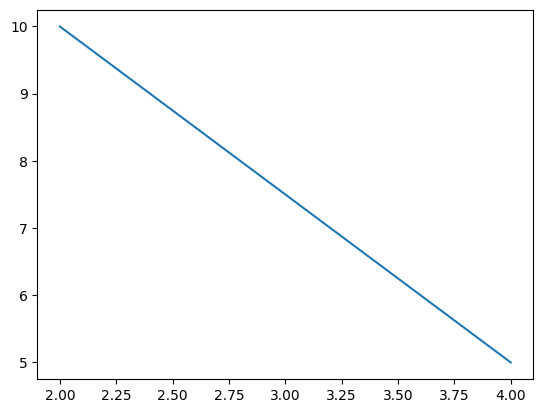

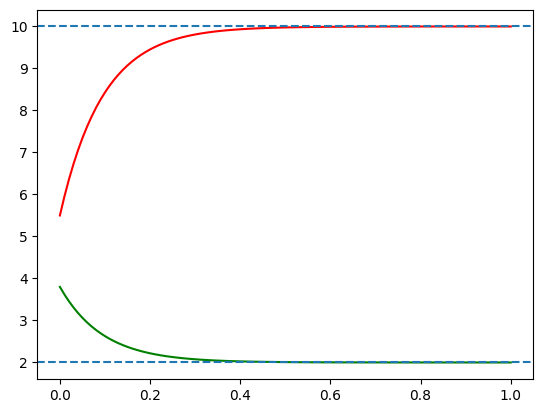

In [27]:
import matplotlib.pyplot as plt
plt.figure(1)

plt.plot(x_log[:,0], x_log[:,1])
plt.figure(2)
plt.plot(time, x_log[1:,1],'r')
plt.plot(time, x_log[1:,0],'g')
plt.axhline(10, linestyle='--')
plt.axhline(2, linestyle='--')

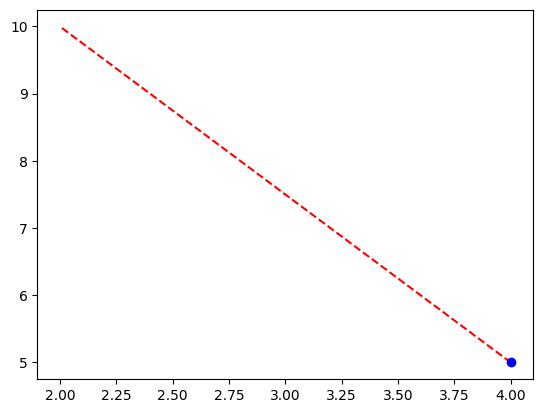

In [135]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())